# Final Capstone Project

This notebook is going to be the final notebook for the capstone project. 

## Importing appropriate packages

In [1]:
# standard packages
import pandas as pd
#pd.set_option("display.max_columns", None)
#pd.set_option("display.max_rows", None)


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# packages for clustering
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as hc
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE

# preprocessing packages
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geocoder # to get coordinates

import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML and XML documents

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

import folium # map rendering library

print('All packages are imported.')

All packages are imported.


## Webscrape a webpage for each of the zipcodes of New York City

#### Since New York is divided by borough, each their own county, they need to be webscraped individually. 

In [30]:
# send the GET request
data = requests.get("https://en.wikipedia.org/wiki/Category:Neighborhoods_in_the_Bronx").text

# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(data, 'html.parser')

# create a list to store neighborhood data
neighborhoodList = []

# append the data into the list
for row in soup.find_all("div", class_="mw-category")[0].findAll("li"):
    neighborhoodList.append(row.text)

# create a new DataFrame from the list
bx = pd.DataFrame({"Neighborhood": neighborhoodList})


bx['Neighborhood'] = bx['Neighborhood'].astype(str).str[1:]


sep = '('
bx['Neighborhood'] = bx['Neighborhood'].apply(lambda x: x.split(sep,1)[0])
bx['Neighborhood'] = bx['Neighborhood'].str.strip()

In [31]:
# define a function to get coordinates
def get_latlng(neighborhood):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Bronx, New York'.format(neighborhood))
        lat_lng_coords = g.latlng
    return lat_lng_coords

# call the function to get the coordinates, store in a new list using list comprehension
coords = [ get_latlng(neighborhood) for neighborhood in bx["Neighborhood"].tolist() ]

In [32]:
# create temporary dataframe to populate the coordinates into Latitude and Longitude
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])

# merge the coordinates into the original dataframe
bx['Latitude'] = df_coords['Latitude']
bx['Longitude'] = df_coords['Longitude']

In [33]:
# save the DataFrame as CSV file
bx.to_csv("bx_neighborhoods.csv", index=False)

# check the neighborhoods and the coordinates
print(bx.shape)
bx

(31, 3)


,Neighborhood,Latitude,Longitude
0,"Bedford Park, Bronx‎",40.869990,-73.88573
1,"Belmont, Bronx‎",40.855460,-73.88569
2,"City Island, Bronx‎",40.855640,-73.79171
3,"Co-op City, Bronx‎",40.879939,-73.82317
4,"Concourse, Bronx‎",40.827630,-73.92533
5,"Eastchester, Bronx‎",40.888110,-73.82835
6,"Fordham, Bronx‎",40.858940,-73.89885
7,"Highbridge, Bronx‎",40.842117,-73.92820
8,"Hunts Point, Bronx‎",40.812420,-73.88450
9,"Jerome Park, Bronx‎",40.865470,-73.89896


## Manhattan

In [34]:
# send the GET request
data = requests.get("https://en.wikipedia.org/wiki/Category:Neighborhoods_in_Manhattan").text

# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(data, 'html.parser')

# create a list to store neighborhood data
neighborhoodList = []

# append the data into the list
for row in soup.find_all("div", class_="mw-category")[0].findAll("li"):
    neighborhoodList.append(row.text)

# create a new DataFrame from the list
mh = pd.DataFrame({"Neighborhood": neighborhoodList})


mh['Neighborhood'] = mh['Neighborhood'].astype(str).str[1:]


sep = '('
mh['Neighborhood'] = mh['Neighborhood'].apply(lambda x: x.split(sep,1)[0])
mh['Neighborhood'] = mh['Neighborhood'].str.strip()

In [35]:
# define a function to get coordinates
def get_latlng(neighborhood):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Manhattan, New York'.format(neighborhood))
        lat_lng_coords = g.latlng
    return lat_lng_coords

# call the function to get the coordinates, store in a new list using list comprehension
coords = [ get_latlng(neighborhood) for neighborhood in mh["Neighborhood"].tolist() ]

In [36]:
# create temporary dataframe to populate the coordinates into Latitude and Longitude
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])

# merge the coordinates into the original dataframe
mh['Latitude'] = df_coords['Latitude']
mh['Longitude'] = df_coords['Longitude']

# save the DataFrame as CSV file
mh.to_csv("mh_neighborhoods.csv", index=False)

# check the neighborhoods and the coordinates
print(mh.shape)
mh

(44, 3)


,Neighborhood,Latitude,Longitude
0,Battery Park City‎,40.711310,-74.015900
1,Bowery‎,40.723280,-73.992893
2,"Chelsea, Manhattan‎",40.746100,-74.000450
3,"Civic Center, Manhattan‎",40.713370,-74.003800
4,Columbus Circle‎,40.765730,-73.983380
5,East Harlem‎,40.798280,-73.940810
6,"East Village, Manhattan‎",40.728040,-73.984990
7,"Financial District, Manhattan‎",40.708260,-74.014100
8,"Five Points, Manhattan‎",45.858578,-111.328778
9,Flatiron District‎,40.739420,-73.990350


## Brooklyn

In [37]:
# send the GET request
data = requests.get("https://en.wikipedia.org/wiki/Category:Neighborhoods_in_Brooklyn").text

# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(data, 'html.parser')

# create a list to store neighborhood data
neighborhoodList = []

# append the data into the list
for row in soup.find_all("div", class_="mw-category")[0].findAll("li"):
    neighborhoodList.append(row.text)

# create a new DataFrame from the list
bk = pd.DataFrame({"Neighborhood": neighborhoodList})


bk['Neighborhood'] = bk['Neighborhood'].astype(str).str[1:]


sep = '('
bk['Neighborhood'] = bk['Neighborhood'].apply(lambda x: x.split(sep,1)[0])
bk['Neighborhood'] = bk['Neighborhood'].str.strip()

In [38]:
# define a function to get coordinates
def get_latlng(neighborhood):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Brooklyn, New York'.format(neighborhood))
        lat_lng_coords = g.latlng
    return lat_lng_coords

# call the function to get the coordinates, store in a new list using list comprehension
coords = [ get_latlng(neighborhood) for neighborhood in bk["Neighborhood"].tolist() ]

# create temporary dataframe to populate the coordinates into Latitude and Longitude
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])

# merge the coordinates into the original dataframe
bk['Latitude'] = df_coords['Latitude']
bk['Longitude'] = df_coords['Longitude']

In [39]:
bk = bk.drop(32,axis = 0)

In [40]:
# save the DataFrame as CSV file
bk.to_csv("bk_neighborhoods.csv", index=False)


# check the neighborhoods and the coordinates
print(bk.shape)
bk

(39, 3)


,Neighborhood,Latitude,Longitude
0,"Bay Ridge, Brooklyn‎",40.619600,-74.027569
1,"Bedford–Stuyvesant, Brooklyn‎",40.681945,-73.933294
2,"Bensonhurst, Brooklyn‎",40.604820,-73.995280
3,Boerum Hill‎,40.689430,-73.988010
4,"Borough Park, Brooklyn‎",40.638820,-73.989120
5,Brighton Beach‎,40.574570,-73.953430
6,Brooklyn Heights‎,40.695350,-73.994050
7,Brooklyn Navy Yard‎,40.705177,-73.971624
8,"Brownsville, Brooklyn‎",40.671134,-73.913476
9,"Bushwick, Brooklyn‎",40.713488,-73.941454


## Queens

In [11]:
# send the GET request
data = requests.get("https://en.wikipedia.org/wiki/Category:Neighborhoods_in_Queens,_New_York").text

# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(data, 'html.parser')

# create a list to store neighborhood data
neighborhoodList = []

# append the data into the list
for row in soup.find_all("div", class_="mw-category")[0].findAll("li"):
    neighborhoodList.append(row.text)

# create a new DataFrame from the list
qn = pd.DataFrame({"Neighborhood": neighborhoodList})


In [12]:
qn['Neighborhood'] = qn['Neighborhood'].astype(str).str[1:]

sep = '('
qn['Neighborhood'] = qn['Neighborhood'].apply(lambda x: x.split(sep,1)[0])
qn['Neighborhood'] = qn['Neighborhood'].str.strip()

In [13]:
# define a function to get coordinates
def get_latlng(neighborhood):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Brooklyn, New York'.format(neighborhood))
        lat_lng_coords = g.latlng
    return lat_lng_coords

# call the function to get the coordinates, store in a new list using list comprehension
coords = [ get_latlng(neighborhood) for neighborhood in qn["Neighborhood"].tolist() ]

# create temporary dataframe to populate the coordinates into Latitude and Longitude
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])

# merge the coordinates into the original dataframe
qn['Latitude'] = df_coords['Latitude']
qn['Longitude'] = df_coords['Longitude']

In [14]:
qn = qn.drop([20,22],axis = 0)


In [15]:
# save the DataFrame as CSV file
qn.to_csv("qn_neighborhoods.csv", index=False)


# check the neighborhoods and the coordinates
print(qn.shape)
qn

(27, 3)


,Neighborhood,Latitude,Longitude
0,"Astoria, Queens‎",40.772050,-73.926060
1,"Bayside, Queens‎",40.777310,-73.780680
2,"Corona, Queens‎",40.746370,-73.854830
3,"Douglaston–Little Neck, Queens‎",40.768561,-73.747657
4,"East Elmhurst, Queens‎",40.764390,-73.874020
5,"Elmhurst, Queens‎",40.743610,-73.884330
6,"Floral Park, New York‎",40.664506,-73.979842
7,"Flushing, Queens‎",40.706477,-73.925219
8,"Forest Hills, Queens‎",40.722660,-73.847910
9,"Fresh Meadows, Queens‎",40.741620,-73.782990


## Staten Island

In [67]:
# send the GET request
data = requests.get("https://en.wikipedia.org/wiki/Category:Neighborhoods_in_Staten_Island").text

# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(data, 'html.parser')

# create a list to store neighborhood data
neighborhoodList = []

# append the data into the list
for row in soup.find_all("div", class_="mw-category")[0].findAll("li"):
    neighborhoodList.append(row.text)

# create a new DataFrame from the list
si = pd.DataFrame({"Neighborhood": neighborhoodList})


In [68]:
si = si.drop([0],axis = 0)

In [69]:
si

,Neighborhood
1,"Annadale, Staten Island"
2,"Arden Heights, Staten Island"
3,"Arlington, Staten Island"
4,"Arrochar, Staten Island"
5,Aspen Knolls
6,"Bay Terrace, Staten Island"
7,"Bloomfield, Staten Island"
8,"Brighton Heights, Staten Island"
9,"Bulls Head, Staten Island"
10,"Castleton Corners, Staten Island"


In [70]:
# define a function to get coordinates
def get_latlng(neighborhood):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Staten Island, New York'.format(neighborhood))
        lat_lng_coords = g.latlng
    return lat_lng_coords

# call the function to get the coordinates, store in a new list using list comprehension
coords = [ get_latlng(neighborhood) for neighborhood in si["Neighborhood"].tolist() ]

# create temporary dataframe to populate the coordinates into Latitude and Longitude
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])

# merge the coordinates into the original dataframe
si['Latitude'] = df_coords['Latitude']
si['Longitude'] = df_coords['Longitude']

In [71]:
si

,Neighborhood,Latitude,Longitude
1,"Annadale, Staten Island",40.559891,-74.198791
2,"Arden Heights, Staten Island",40.642395,-74.110820
3,"Arlington, Staten Island",40.642420,-74.075270
4,"Arrochar, Staten Island",40.562344,-74.184025
5,Aspen Knolls,40.554536,-74.135866
6,"Bay Terrace, Staten Island",40.610592,-74.179655
7,"Bloomfield, Staten Island",40.504032,-74.243297
8,"Brighton Heights, Staten Island",40.642420,-74.075270
9,"Bulls Head, Staten Island",40.621220,-74.129150
10,"Castleton Corners, Staten Island",40.549418,-74.216839


In [72]:
# save the DataFrame as CSV file
si.to_csv("si_neighborhoods.csv", index=False)


# check the neighborhoods and the coordinates
print(si.shape)
si

(73, 3)


,Neighborhood,Latitude,Longitude
1,"Annadale, Staten Island",40.559891,-74.198791
2,"Arden Heights, Staten Island",40.642395,-74.110820
3,"Arlington, Staten Island",40.642420,-74.075270
4,"Arrochar, Staten Island",40.562344,-74.184025
5,Aspen Knolls,40.554536,-74.135866
6,"Bay Terrace, Staten Island",40.610592,-74.179655
7,"Bloomfield, Staten Island",40.504032,-74.243297
8,"Brighton Heights, Staten Island",40.642420,-74.075270
9,"Bulls Head, Staten Island",40.621220,-74.129150
10,"Castleton Corners, Staten Island",40.549418,-74.216839


In [87]:
ny = pd.concat([bx,mh,bk,qn,si], ignore_index = True)

In [88]:
ny

,Neighborhood,Latitude,Longitude
0,"Bedford Park, Bronx‎",40.869990,-73.885730
1,"Belmont, Bronx‎",40.855460,-73.885690
2,"City Island, Bronx‎",40.855640,-73.791710
3,"Co-op City, Bronx‎",40.879939,-73.823170
4,"Concourse, Bronx‎",40.827630,-73.925330
5,"Eastchester, Bronx‎",40.888110,-73.828350
6,"Fordham, Bronx‎",40.858940,-73.898850
7,"Highbridge, Bronx‎",40.842117,-73.928200
8,"Hunts Point, Bronx‎",40.812420,-73.884500
9,"Jerome Park, Bronx‎",40.865470,-73.898960


In [89]:
ny = ny.drop([39,47,213],axis= 0)

In [90]:
ny.to_csv('ny_neighborhood.csv',index=False)


## Map the points using Folium

In [91]:
# get the coordinates of New York City
address = 'New York, New York'

geolocator = Nominatim(user_agent="coursera-capstone-project")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York, New York {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York, New York 40.7127281, -74.0060152.


In [93]:
# create map of Toronto using latitude and longitude values
map_ny = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(ny['Latitude'], ny['Longitude'], ny['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_ny)  
    
map_ny

## Next, we use the Foursquare API. 

#### First, for New York City

In [2]:
ny = pd.read_csv('ny_neighborhood.csv')

In [3]:
# define Foursquare Credentials and Version
CLIENT_ID = 'YY33K33K0USBP5V1DVMQWJRA1GKLTOYNUO5XBIYNYTTZK3SU' # your Foursquare ID
CLIENT_SECRET = 'QLZR43OPOROIGFRTDKNQYJE3PXMYW4TTGFWQZK4VAAOAIXY4' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version


In [4]:
radius = 2000
LIMIT = 200

venues = []

for lat, long, neighborhood in zip(ny['Latitude'], ny['Longitude'], ny['Neighborhood']):
    
    # create the API request URL
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    # return only relevant information for each nearby venue
    for venue in results:
        venues.append((
            neighborhood,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [5]:

# convert the venues list into a new DataFrame
venues_df = pd.DataFrame(venues)

# define the column names
venues_df.columns = ['Neighborhood', 'Latitude', 'Longitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']

print(venues_df.shape)
venues_df.head()

(19503, 7)


,Neighborhood,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,"Bedford Park, Bronx‎",40.86999,-73.88573,E. Mosholu Parkway South and Bainbridge Ave,40.872248,-73.882286,Park
1,"Bedford Park, Bronx‎",40.86999,-73.88573,The New York Botanical Gardens - The Rock Garden,40.864459,-73.882456,Beer Garden
2,"Bedford Park, Bronx‎",40.86999,-73.88573,Enid A. Haupt Conservatory,40.864256,-73.882154,Botanical Garden
3,"Bedford Park, Bronx‎",40.86999,-73.88573,Mosholu Gate,40.866607,-73.880878,Garden
4,"Bedford Park, Bronx‎",40.86999,-73.88573,National Restaurant & Coffee,40.873007,-73.889082,Diner


In [6]:
venues_df.groupby(["Neighborhood"]).count()

,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
Neighborhood,,,,,,
"Annadale, Staten Island",39,39,39,39,39,39
"Arden Heights, Staten Island",100,100,100,100,100,100
"Arlington, Staten Island",93,93,93,93,93,93
"Arrochar, Staten Island",64,64,64,64,64,64
Aspen Knolls,55,55,55,55,55,55
...,...,...,...,...,...,...
"Willowbrook, Staten Island",71,71,71,71,71,71
"Woodhaven, Queens‎",100,100,100,100,100,100
"Woodside, Queens‎",100,100,100,100,100,100


In [7]:
print('There are {} uniques categories.'.format(len(venues_df['VenueCategory'].unique())))


# print out the list of categories
venues_df['VenueCategory'].unique()[:50]

There are 419 uniques categories.


array(['Park', 'Beer Garden', 'Botanical Garden', 'Garden', 'Diner',
       'Exhibit', 'History Museum', 'Gift Shop', 'Farmers Market',
       'Pizza Place', 'Italian Restaurant', 'Café', 'Coffee Shop',
       'Food Truck', 'Deli / Bodega', 'Mexican Restaurant',
       'Martial Arts School', 'Pub', 'Vietnamese Restaurant', 'Trail',
       'Gym / Fitness Center', 'Theater', 'Supermarket', 'Tattoo Parlor',
       'Bakery', 'Food & Drink Shop', 'Market', 'Fish Market',
       'Video Game Store', 'Dessert Shop', 'Plaza', 'Grocery Store',
       'Smoke Shop', 'Juice Bar', 'Sandwich Place',
       'Fast Food Restaurant', 'Bar', 'Liquor Store', 'Yoga Studio',
       'Latin American Restaurant', 'Gourmet Shop', 'Zoo', 'Tram Station',
       'Chinese Restaurant', 'Caribbean Restaurant', 'Gym', 'Cheese Shop',
       'Zoo Exhibit', 'Theme Park', 'Souvenir Shop'], dtype=object)

In [8]:
# one hot encoding
ny_hot = pd.get_dummies(venues_df[['VenueCategory']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
ny_hot['Neighborhoods'] = venues_df['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [ny_hot.columns[-1]] + list(ny_hot.columns[:-1])
ny_hot = ny_hot[fixed_columns]

print(ny_hot.shape)
ny_hot.head()

(19503, 420)


,Neighborhoods,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Lounge,Airport Service,American Restaurant,Amphitheater,Animal Shelter,...,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,"Bedford Park, Bronx‎",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Bedford Park, Bronx‎",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Bedford Park, Bronx‎",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Bedford Park, Bronx‎",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Bedford Park, Bronx‎",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:

ny_grouped = ny_hot.groupby(["Neighborhoods"]).mean().reset_index()

print(ny_grouped.shape)
ny_grouped

(211, 420)


,Neighborhoods,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Lounge,Airport Service,American Restaurant,Amphitheater,Animal Shelter,...,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,"Annadale, Staten Island",0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.00,0.00,0.000000,0.0,0.000000,0.00,0.00,0.00,0.0
1,"Arden Heights, Staten Island",0.0,0.0,0.0,0.0,0.0,0.0,0.010000,0.0,0.0,...,0.0,0.00,0.00,0.000000,0.0,0.010000,0.00,0.00,0.01,0.0
2,"Arlington, Staten Island",0.0,0.0,0.0,0.0,0.0,0.0,0.010753,0.0,0.0,...,0.0,0.00,0.00,0.010753,0.0,0.000000,0.00,0.00,0.00,0.0
3,"Arrochar, Staten Island",0.0,0.0,0.0,0.0,0.0,0.0,0.015625,0.0,0.0,...,0.0,0.00,0.00,0.015625,0.0,0.015625,0.00,0.00,0.00,0.0
4,Aspen Knolls,0.0,0.0,0.0,0.0,0.0,0.0,0.036364,0.0,0.0,...,0.0,0.00,0.00,0.000000,0.0,0.000000,0.00,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,"Willowbrook, Staten Island",0.0,0.0,0.0,0.0,0.0,0.0,0.014085,0.0,0.0,...,0.0,0.00,0.00,0.014085,0.0,0.000000,0.00,0.00,0.00,0.0
207,"Woodhaven, Queens‎",0.0,0.0,0.0,0.0,0.0,0.0,0.020000,0.0,0.0,...,0.0,0.00,0.00,0.000000,0.0,0.000000,0.00,0.00,0.00,0.0
208,"Woodside, Queens‎",0.0,0.0,0.0,0.0,0.0,0.0,0.030000,0.0,0.0,...,0.0,0.00,0.00,0.010000,0.0,0.000000,0.00,0.00,0.00,0.0
209,World Trade Center‎,0.0,0.0,0.0,0.0,0.0,0.0,0.010000,0.0,0.0,...,0.0,0.01,0.00,0.030000,0.0,0.000000,0.00,0.01,0.00,0.0


# I have too many features so I am going to use PCA

In [10]:
from sklearn.decomposition import PCA

In [11]:
ny_grouped.columns.values

array(['Neighborhoods', 'Accessories Store', 'Adult Boutique',
       'Afghan Restaurant', 'African Restaurant', 'Airport Lounge',
       'Airport Service', 'American Restaurant', 'Amphitheater',
       'Animal Shelter', 'Antique Shop', 'Aquarium', 'Arcade',
       'Arepa Restaurant', 'Argentinian Restaurant', 'Art Gallery',
       'Art Museum', 'Arts & Crafts Store', 'Arts & Entertainment',
       'Asian Restaurant', 'Athletics & Sports', 'Auditorium',
       'Australian Restaurant', 'Austrian Restaurant', 'Auto Dealership',
       'Automotive Shop', 'BBQ Joint', 'Bagel Shop', 'Bakery', 'Bank',
       'Bar', 'Baseball Field', 'Baseball Stadium', 'Basketball Court',
       'Basketball Stadium', 'Bath House', 'Beach', 'Beer Bar',
       'Beer Garden', 'Beer Store', 'Big Box Store',
       'Bike Rental / Bike Share', 'Bike Shop', 'Bike Trail', 'Bistro',
       'Board Shop', 'Boat or Ferry', 'Bookstore', 'Border Crossing',
       'Botanical Garden', 'Boutique', 'Bowling Alley', 'Boxing Gy

In [12]:
ny_grouped.isna().sum()

Neighborhoods         0
Accessories Store     0
Adult Boutique        0
Afghan Restaurant     0
African Restaurant    0
                     ..
Wings Joint           0
Women's Store         0
Yoga Studio           0
Zoo                   0
Zoo Exhibit           0
Length: 420, dtype: int64

In [22]:
X = ny_grouped[['Accessories Store', 'Adult Boutique',
       'Afghan Restaurant', 'African Restaurant', 'Airport Lounge',
       'Airport Service', 'American Restaurant', 'Amphitheater',
       'Animal Shelter', 'Antique Shop', 'Aquarium', 'Arcade',
       'Arepa Restaurant', 'Argentinian Restaurant', 'Art Gallery',
       'Art Museum', 'Arts & Crafts Store', 'Asian Restaurant',
       'Athletics & Sports', 'Auditorium', 'Australian Restaurant',
       'Austrian Restaurant', 'Auto Dealership', 'Auto Garage',
       'Automotive Shop', 'BBQ Joint', 'Bagel Shop', 'Bakery', 'Bank',
       'Bar', 'Baseball Field', 'Baseball Stadium', 'Basketball Court',
       'Basketball Stadium', 'Bath House', 'Beach', 'Beer Bar',
       'Beer Garden', 'Beer Store', 'Big Box Store',
       'Bike Rental / Bike Share', 'Bike Shop', 'Bike Trail', 'Bistro',
       'Board Shop', 'Boat or Ferry', 'Bookstore', 'Border Crossing',
       'Botanical Garden', 'Boutique', 'Bowling Alley', 'Boxing Gym',
       'Brazilian Restaurant', 'Breakfast Spot', 'Brewery', 'Bridal Shop',
       'Bridge', 'Bubble Tea Shop', 'Buffet', 'Building', 'Burger Joint',
       'Burmese Restaurant', 'Burrito Place', 'Bus Station', 'Bus Stop',
       'Business Service', 'Butcher', 'Cafeteria', 'Café',
       'Cajun / Creole Restaurant', 'Camera Store', 'Campground',
       'Candy Store', 'Cantonese Restaurant', 'Caribbean Restaurant',
       'Castle', 'Caucasian Restaurant', 'Cemetery',
       'Check Cashing Service', 'Cheese Shop', 'Chinese Restaurant',
       'Chocolate Shop', 'Christmas Market', 'Church', 'Circus',
       'Climbing Gym', 'Clothing Store', 'Club House', 'Cocktail Bar',
       'Coffee Shop', 'College Arts Building', 'College Gym',
       'Colombian Restaurant', 'Comedy Club', 'Comfort Food Restaurant',
       'Comic Shop', 'Community Center', 'Concert Hall',
       'Construction & Landscaping', 'Convenience Store',
       'Cooking School', 'Cosmetics Shop', 'Coworking Space', 'Creperie',
       'Cuban Restaurant', 'Cultural Center', 'Cupcake Shop',
       'Cycle Studio', 'Dance Studio', 'Deli / Bodega',
       'Department Store', 'Dessert Shop', 'Dim Sum Restaurant', 'Diner',
       'Discount Store', 'Distillery', 'Dive Bar', "Doctor's Office",
       'Dog Run', 'Donut Shop', 'Dosa Place', 'Dry Cleaner',
       'Dumpling Restaurant', 'Eastern European Restaurant',
       'Electronics Store', 'Elementary School', 'Empanada Restaurant',
       'English Restaurant', 'Escape Room', 'Ethiopian Restaurant',
       'Event Service', 'Event Space', 'Exhibit', 'Factory',
       'Falafel Restaurant', 'Farm', 'Farmers Market',
       'Fast Food Restaurant', 'Field', 'Filipino Restaurant',
       'Film Studio', 'Fish & Chips Shop', 'Fish Market', 'Fishing Store',
       'Flower Shop', 'Food', 'Food & Drink Shop', 'Food Court',
       'Food Service', 'Food Truck', 'Fountain', 'French Restaurant',
       'Fried Chicken Joint', 'Frozen Yogurt Shop',
       'Fruit & Vegetable Store', 'Furniture / Home Store', 'Gaming Cafe',
       'Garden', 'Garden Center', 'Gas Station', 'Gastropub',
       'General Entertainment', 'German Restaurant', 'Gift Shop',
       'Gluten-free Restaurant', 'Go Kart Track', 'Golf Course',
       'Golf Driving Range', 'Gourmet Shop', 'Greek Restaurant',
       'Grocery Store', 'Gym', 'Gym / Fitness Center', 'Gym Pool',
       'Gymnastics Gym', 'Halal Restaurant', 'Harbor / Marina',
       'Hardware Store', 'Hawaiian Restaurant', 'Health & Beauty Service',
       'Health Food Store', 'Heliport', 'High School',
       'Himalayan Restaurant', 'Historic Site', 'History Museum',
       'Hobby Shop', 'Home Service', 'Hookah Bar', 'Hostel',
       'Hot Dog Joint', 'Hotel', 'Hotel Bar', 'Hotpot Restaurant',
       'Ice Cream Shop', 'Indian Restaurant', 'Indie Movie Theater',
       'Indie Theater', 'Indonesian Restaurant', 'Indoor Play Area',
       'Intersection', 'Irish Pub', 'Island', 'Israeli Restaurant',
       'Italian Restaurant', 'Japanese Restaurant', 'Jazz Club',
       'Jewelry Store', 'Jewish Restaurant', 'Juice Bar', 'Karaoke Bar',
       'Kebab Restaurant', 'Kids Store', 'Kitchen Supply Store',
       'Kofte Place', 'Korean Restaurant', 'Kosher Restaurant', 'Lake',
       'Latin American Restaurant', 'Laundry Service', 'Lawyer',
       'Lebanese Restaurant', 'Library', 'Lighthouse', 'Lingerie Store',
       'Liquor Store', 'Locksmith', 'Lounge', 'Luggage Store',
       'Mac & Cheese Joint', 'Malay Restaurant', 'Market',
       'Martial Arts School', 'Massage Studio', 'Mattress Store',
       'Medical Center', 'Mediterranean Restaurant', 'Memorial Site',
       "Men's Store", 'Metro Station', 'Mexican Restaurant',
       'Middle Eastern Restaurant', 'Mini Golf', 'Miscellaneous Shop',
       'Mobile Phone Shop', 'Modern Greek Restaurant',
       'Molecular Gastronomy Restaurant', 'Monument / Landmark',
       'Moroccan Restaurant', 'Motel', 'Motorcycle Shop', 'Movie Theater',
       'Moving Target', 'Museum', 'Music Store', 'Music Venue',
       'Nail Salon', 'Neighborhood', 'New American Restaurant',
       'Newsstand', 'Nightclub', 'Nightlife Spot', 'Non-Profit',
       'Noodle House', 'North Indian Restaurant', 'Office', 'Opera House',
       'Optical Shop', 'Organic Grocery', 'Other Great Outdoors',
       'Other Nightlife', 'Outdoor Sculpture', 'Outdoors & Recreation',
       'Outlet Mall', 'Outlet Store', 'Paella Restaurant',
       'Paintball Field', 'Pakistani Restaurant',
       'Paper / Office Supplies Store', 'Park', 'Pedestrian Plaza',
       'Performing Arts Venue', 'Persian Restaurant',
       'Peruvian Restaurant', 'Pet Café', 'Pet Service', 'Pet Store',
       'Pharmacy', 'Photography Studio', 'Picnic Shelter', 'Pie Shop',
       'Pier', 'Pilates Studio', 'Pizza Place', 'Planetarium',
       'Playground', 'Plaza', 'Poke Place', 'Polish Restaurant', 'Pool',
       'Pool Hall', 'Portuguese Restaurant', 'Post Office', 'Pub',
       'Public Art', 'Puerto Rican Restaurant', 'Racetrack',
       'Ramen Restaurant', 'Record Shop', 'Recording Studio',
       'Recreation Center', 'Rental Car Location', 'Rental Service',
       'Reservoir', 'Residential Building (Apartment / Condo)', 'Resort',
       'Rest Area', 'Restaurant', 'River', 'Rock Club', 'Roof Deck',
       'Russian Restaurant', 'Sake Bar', 'Salad Place',
       'Salon / Barbershop', 'Salvadoran Restaurant', 'Sandwich Place',
       'Scandinavian Restaurant', 'Scenic Lookout', 'School',
       'Science Museum', 'Sculpture Garden', 'Seafood Restaurant',
       'Shanghai Restaurant', 'Shipping Store', 'Shoe Repair',
       'Shoe Store', 'Shopping Mall', 'Shopping Plaza', 'Skate Park',
       'Skating Rink', 'Smoke Shop', 'Smoothie Shop', 'Snack Place',
       'Soccer Field', 'Social Club', 'Soup Place',
       'South American Restaurant', 'Southern / Soul Food Restaurant',
       'Souvenir Shop', 'Souvlaki Shop', 'Spa', 'Spanish Restaurant',
       'Speakeasy', 'Sporting Goods Shop', 'Sports Bar', 'Sports Club',
       'Sri Lankan Restaurant', 'Stables', 'Stadium',
       'State / Provincial Park', 'Stationery Store', 'Steakhouse',
       'Storage Facility', 'Street Art', 'Street Food Gathering',
       'Supermarket', 'Supplement Shop', 'Surf Spot', 'Sushi Restaurant',
       'Szechuan Restaurant', 'TV Station', 'Taco Place',
       'Taiwanese Restaurant', 'Tanning Salon', 'Tapas Restaurant',
       'Tattoo Parlor', 'Tea Room', 'Tennis Court', 'Tennis Stadium',
       'Tex-Mex Restaurant', 'Thai Restaurant', 'Theater', 'Theme Park',
       'Theme Park Ride / Attraction', 'Theme Restaurant',
       'Thrift / Vintage Store', 'Tibetan Restaurant', 'Tiki Bar',
       'Toll Plaza', 'Tourist Information Center', 'Toy / Game Store',
       'Track', 'Track Stadium', 'Trail', 'Train Station', 'Tram Station',
       'Tree', 'Turkish Restaurant', 'Udon Restaurant',
       'Varenyky restaurant', 'Vegetarian / Vegan Restaurant',
       'Venezuelan Restaurant', 'Veterinarian', 'Video Game Store',
       'Video Store', 'Vietnamese Restaurant', 'Volleyball Court',
       'Warehouse Store', 'Waterfront', 'Weight Loss Center',
       'Whisky Bar', 'Wine Bar', 'Wine Shop', 'Winery', 'Wings Joint',
       "Women's Store", 'Yoga Studio', 'Zoo', 'Zoo Exhibit']]

### Try to group them based on outdoor/fitness space 

In [13]:
X = ny_grouped[[
       'Athletics & Sports', 'Baseball Field', 'Baseball Stadium', 'Basketball Court',
       'Basketball Stadium', 'Beach', 'Bike Trail','Climbing Gym',  'College Gym',
       'Dog Run','Field',
       'Garden','Golf Course',
       'Gym', 'Gym / Fitness Center', 'Gym Pool',
       'Gymnastics Gym', 'Lake', 'Outdoors & Recreation', 
       'Playground', 'Pool','Recreation Center', 'Stadium',
       'State / Provincial Park', 'Track Stadium', 'Trail', 'Volleyball Court']]
print(len(X))

211


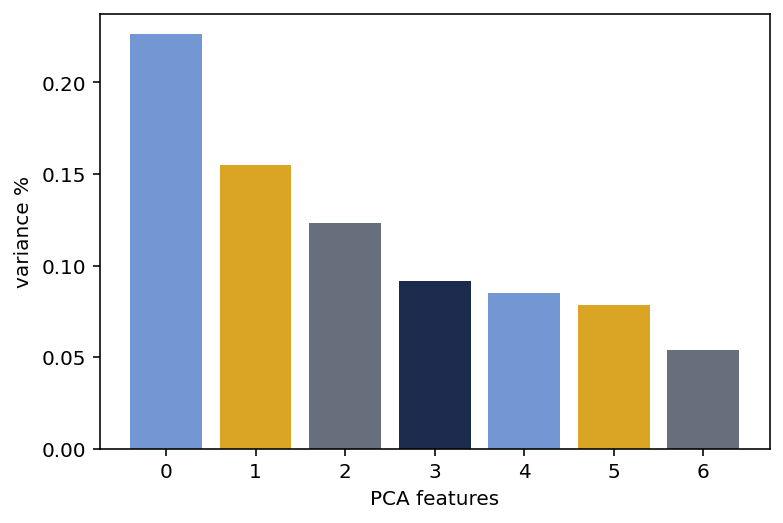

In [14]:
from sklearn.decomposition import PCA

%config InlineBackend.figure_format='retina'
# Standardize the data to have a mean of ~0 and a variance of 1
X_std =  MinMaxScaler().fit_transform(X)
# Create a PCA instance: pca
pca = PCA(n_components=.8)
principalComponents = pca.fit_transform(X)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color=('#7297d2','#daa525', '#676e7c', '#1b2a4d'))
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

In [15]:
PCA_components

,0,1,2,3,4,5,6
0,-0.000884,-0.010463,-0.026314,-0.002277,-0.027471,0.037881,-0.000768
1,-0.006160,0.000371,0.006221,0.001911,-0.001226,-0.003036,-0.002792
2,0.001144,-0.002772,-0.012361,-0.010533,-0.003755,-0.006271,0.003311
3,-0.005055,-0.000940,-0.008394,0.001047,0.010242,0.008313,-0.005255
4,0.013298,0.006240,0.006115,0.010066,0.002434,-0.002634,-0.009461
...,...,...,...,...,...,...,...
206,-0.003998,-0.004212,-0.010364,0.003866,0.003712,0.015615,-0.004155
207,-0.003305,-0.001576,-0.011572,-0.001108,0.001181,0.005744,0.008741
208,0.002252,-0.011358,-0.003641,0.007910,0.017267,0.001360,-0.006866
209,-0.008224,0.008182,-0.002931,-0.000855,-0.000191,-0.006429,0.000894


In [16]:
eig_values = pca.explained_variance_
eig_vectors = pca.components_

pc1 = pca.components_[0]
pc2 = pca.components_[1]
pc3 = pca.components_[2]
pc4 = pca.components_[3]
pc5 = pca.components_[4]
pc6 = pca.components_[5]
pc7 = pca.components_[6]



In [17]:
eig_values[0]

0.0002541025069041793

In [18]:
# get the loadings
structure_loading_1 = pc1* np.sqrt(eig_values[0])
str_loading_1 = pd.Series(structure_loading_1, index=X.columns.values)
str_loading_1

Athletics & Sports         0.000856
Baseball Field             0.000483
Baseball Stadium           0.001326
Basketball Court           0.000228
Basketball Stadium        -0.000110
Beach                      0.012705
Bike Trail                 0.000117
Climbing Gym              -0.000172
College Gym                0.000007
Dog Run                   -0.000380
Field                     -0.000067
Garden                    -0.002014
Golf Course               -0.000207
Gym                       -0.007640
Gym / Fitness Center      -0.004998
Gym Pool                   0.000004
Gymnastics Gym            -0.000040
Lake                      -0.000026
Outdoors & Recreation      0.001296
Playground                -0.000608
Pool                      -0.000174
Recreation Center         -0.000029
Stadium                    0.000007
State / Provincial Park   -0.000048
Track Stadium             -0.000152
Trail                     -0.000392
Volleyball Court          -0.000070
dtype: float64

In [19]:
# get the loadings
structure_loading_2 = pc2* np.sqrt(eig_values[1])
str_loading_2 = pd.Series(structure_loading_2, index=X.columns.values)
str_loading_2

Athletics & Sports         0.000707
Baseball Field            -0.000293
Baseball Stadium           0.001574
Basketball Court          -0.000744
Basketball Stadium         0.000109
Beach                      0.006075
Bike Trail                -0.000236
Climbing Gym               0.000059
College Gym               -0.000033
Dog Run                   -0.002894
Field                     -0.000640
Garden                    -0.004113
Golf Course               -0.001962
Gym                        0.007817
Gym / Fitness Center       0.006283
Gym Pool                  -0.000014
Gymnastics Gym            -0.000363
Lake                      -0.000013
Outdoors & Recreation      0.000402
Playground                -0.001229
Pool                      -0.000483
Recreation Center         -0.000175
Stadium                   -0.000018
State / Provincial Park   -0.000031
Track Stadium              0.000256
Trail                     -0.001162
Volleyball Court           0.000144
dtype: float64

In [ ]:
structure_loading_3 = pc3* np.sqrt(eig_values[2])
str_loading_3 = pd.Series(structure_loading_3, index=X.columns.values)
str_loading_3